In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

In [2]:
X = np.genfromtxt("hw09_data_set.csv", delimiter=',')
X.shape

(1000, 2)

In [3]:
N = len(X)
print(N)

1000


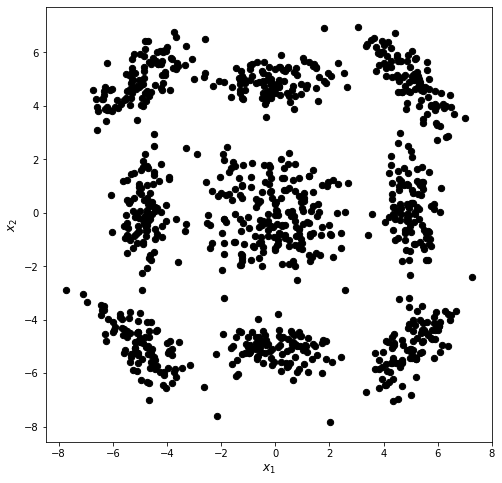

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=40, color="k")

plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)

plt.show()

## Eucledian Distance and Visualization

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt((x2[0] - x1[0])**2 + (x2[1] - x1[1])**2)

In [6]:
euc = np.array([[euclidean_distance(X[i], X[k]) for k in range(N)] for i in range(N)])  #eucledian distances

threshold = 2

B = np.array([[1 if euc[i, k] < threshold and i != k else 0 for k in range(N)] for i in range(N)])  #B matrice
B.shape

(1000, 1000)

In [7]:
print(f"Euclidean Distances:\n{euc}")

Euclidean Distances:
[[0.         3.43155242 1.47659004 ... 9.13877946 8.02518918 7.69494539]
 [3.43155242 0.         1.95733324 ... 7.46138398 7.81062416 6.48533181]
 [1.47659004 1.95733324 0.         ... 8.2322304  7.68676453 6.93850841]
 ...
 [9.13877946 7.46138398 8.2322304  ... 0.         3.61743345 1.68682358]
 [8.02518918 7.81062416 7.68676453 ... 3.61743345 0.         2.37633299]
 [7.69494539 6.48533181 6.93850841 ... 1.68682358 2.37633299 0.        ]]


In [8]:
print(f"B matrix:\n{B}")

B matrix:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


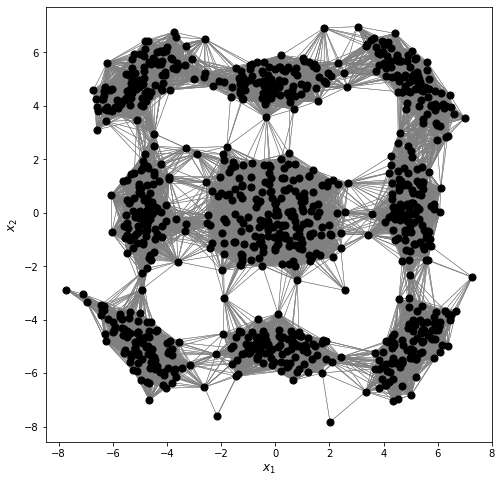

In [9]:
plt.figure(figsize=(8, 8))

for i in range(N):
    for k in range(N):
        if B[i, k] == 1 and i != k:
            plt.plot(np.array([X[i, 0], X[k, 0]]), np.array([X[i, 1], X[k, 1]]), linewidth=0.5, c="grey")

plt.scatter(X[:, 0], X[:, 1], s=50, color="k", zorder=3)

plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)

plt.show()

# D and L Matrices

In [15]:
D = np.zeros((N,N), dtype=int)

for i in range(N):
    D[i, i] = B[i].sum()
    
print(f"Degree Matrix:\n{D}")

Degree Matrix:
[[ 73   0   0 ...   0   0   0]
 [  0  42   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  75   0   0]
 [  0   0   0 ...   0  83   0]
 [  0   0   0 ...   0   0 124]]


In [16]:
L = D - B
print(f"Laplacian Matrix:\n{L}")

Laplacian Matrix:
[[ 73   0  -1 ...   0   0   0]
 [  0  42  -1 ...   0   0   0]
 [ -1  -1  84 ...   0   0   0]
 ...
 [  0   0   0 ...  75   0  -1]
 [  0   0   0 ...   0  83   0]
 [  0   0   0 ...  -1   0 124]]


In [17]:
D_new = np.zeros((N, N))

for i in range(N):
    D_new[i, i] = D[i, i]**(-1/2)

In [18]:
L_symmetric = np.eye(N) - (D_new @ B @ D_new)
print(f"Normalized Laplacian Matrix:\n{L_symmetric}")

Normalized Laplacian Matrix:
[[ 1.          0.         -0.01277024 ...  0.          0.
   0.        ]
 [ 0.          1.         -0.01683588 ...  0.          0.
   0.        ]
 [-0.01277024 -0.01683588  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
  -0.01036952]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ... -0.01036952  0.
   1.        ]]


## Eigenvectors and Z matrix

In [19]:
R = 5
eig_vals, eig_vecs = np.linalg.eig(L_symmetric)
Z = eig_vecs[:,np.argsort(eig_vals)[1:R+1]]
print(f"Z Matrix:\n{Z}")
print(Z.shape)

Z Matrix:
[[ 0.02492986+0.j -0.03008423+0.j -0.00946604+0.j  0.05116243+0.j
   0.0229564 +0.j]
 [ 0.01590745+0.j -0.02367529+0.j -0.00235798+0.j  0.037579  +0.j
   0.0141235 +0.j]
 [ 0.02601003+0.j -0.03273215+0.j -0.00886993+0.j  0.05526008+0.j
   0.02411414+0.j]
 ...
 [ 0.00663302+0.j  0.01790176+0.j  0.04311147+0.j -0.00548191+0.j
   0.00680055+0.j]
 [ 0.00821935+0.j  0.02022679+0.j  0.04500294+0.j -0.00603256+0.j
   0.00495351+0.j]
 [ 0.00979706+0.j  0.02328208+0.j  0.05632946+0.j -0.00624278+0.j
   0.00747075+0.j]]
(1000, 5)


## Centroids

In [20]:
centroids = np.vstack([Z[242], Z[528], Z[570], Z[590], Z[648],Z[667],Z[774],Z[891],Z[955]])   # K is 9
print(f"Initial Centroids:\n{centroids}")

Initial Centroids:
[[-0.04294557+0.j  0.03726957+0.j -0.03025241+0.j  0.03746632+0.j
  -0.02352096+0.j]
 [ 0.03213887+0.j  0.00312722+0.j -0.03487926+0.j -0.01676179+0.j
   0.00058556+0.j]
 [ 0.03445218+0.j  0.00129893+0.j -0.03678218+0.j -0.01393956+0.j
   0.00330641+0.j]
 [ 0.03738225+0.j -0.00323705+0.j -0.03812984+0.j -0.00587327+0.j
   0.00894704+0.j]
 [ 0.00663599+0.j  0.03058887+0.j  0.01875376+0.j -0.01247497+0.j
  -0.01785995+0.j]
 [ 0.00417812+0.j  0.03000135+0.j  0.01789371+0.j -0.00990218+0.j
  -0.01772138+0.j]
 [-0.05209764+0.j -0.01087283+0.j -0.01336235+0.j -0.03366291+0.j
   0.06899458+0.j]
 [ 0.00593715+0.j  0.01773043+0.j  0.03366306+0.j -0.00562591+0.j
   0.0014817 +0.j]
 [ 0.00917073+0.j  0.02108962+0.j  0.05191653+0.j -0.00535473+0.j
   0.00692638+0.j]]


## Run K-means Algorithm

In [21]:
def update_memberships(centroids, X):
    D = spa.distance_matrix(centroids, X)
    memberships = np.argmin(D, axis = 0)
    return(memberships)

def update_centroids(memberships, X):
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

In [22]:
memberships = update_memberships(centroids, Z)
iteration = 1
K = 9

while True:
    print(f"Iteration #{iteration}")
    print(f"Centroids:\n{centroids}")
    print(f"Memberships:\n{memberships}\n")
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break
    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    iteration += 1
    
centroids = update_centroids(memberships, X)

Iteration #1
Centroids:
[[-0.04294557+0.j  0.03726957+0.j -0.03025241+0.j  0.03746632+0.j
  -0.02352096+0.j]
 [ 0.03213887+0.j  0.00312722+0.j -0.03487926+0.j -0.01676179+0.j
   0.00058556+0.j]
 [ 0.03445218+0.j  0.00129893+0.j -0.03678218+0.j -0.01393956+0.j
   0.00330641+0.j]
 [ 0.03738225+0.j -0.00323705+0.j -0.03812984+0.j -0.00587327+0.j
   0.00894704+0.j]
 [ 0.00663599+0.j  0.03058887+0.j  0.01875376+0.j -0.01247497+0.j
  -0.01785995+0.j]
 [ 0.00417812+0.j  0.03000135+0.j  0.01789371+0.j -0.00990218+0.j
  -0.01772138+0.j]
 [-0.05209764+0.j -0.01087283+0.j -0.01336235+0.j -0.03366291+0.j
   0.06899458+0.j]
 [ 0.00593715+0.j  0.01773043+0.j  0.03366306+0.j -0.00562591+0.j
   0.0014817 +0.j]
 [ 0.00917073+0.j  0.02108962+0.j  0.05191653+0.j -0.00535473+0.j
   0.00692638+0.j]]
Memberships:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

## Clustering Results

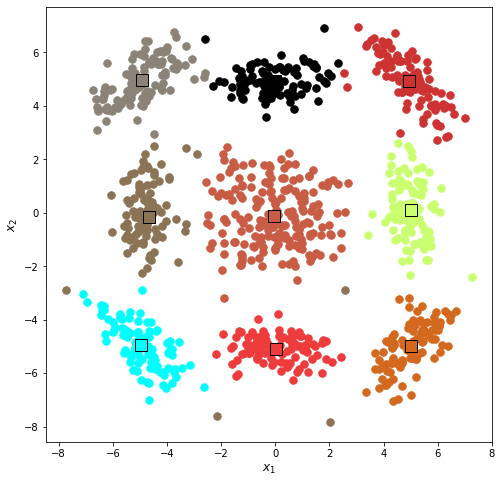

In [25]:
colors = ["#00FFFF", "#8B8378", "#000000", "#CD3333", "#8B7355","#D2691E","#EE3B3B","#CAFF70","#C85C44"]

plt.figure(figsize=(8, 8))

for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 15, color=colors[c])

for c in range(K):
    plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
             markerfacecolor = colors[c], markeredgecolor = "black")
    
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
    
plt.show()